In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import cv2
from PIL import Image as Image_PIL
from os import listdir
from matplotlib.image import imread
import time
from random import sample
from sklearn import manifold, decomposition, preprocessing
from sklearn.model_selection import train_test_split


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

D:\Users\Damien\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# Afficher toutes les lignes et colonnes
pd.set_option('display.max_columns', None)

In [ ]:
# Set the style of plots
plt.style.use('fivethirtyeight')

In [3]:
# Import csv
df_essai1 = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\modifie\essai1.csv")
df_essai1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# df_essai1 = df_essai1.sample(100000)

#### Feature engineering

This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning

Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction

https://community.alteryx.com/t5/Data-Science/Feature-Engineering-Secret-to-Data-Science-Success/ba-p/545041

**Features crées**

- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age
- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due

In [56]:
# Temps travaillé // Age
df_essai1['DAYS_EMPLOYED_PERCENT'] = abs(df_essai1['DAYS_EMPLOYED']) / abs(df_essai1['DAYS_BIRTH'])

In [53]:
# Crédit // Revenu
df_essai1['CREDIT_INCOME_PERCENT'] = (df_essai1['AMT_CREDIT'] / df_essai1['AMT_INCOME_TOTAL'])

In [54]:
# Annuity // Revenu
df_essai1['ANNUITY_INCOME_PERCENT'] = (df_essai1['AMT_ANNUITY'] / df_essai1['AMT_INCOME_TOTAL'])

In [55]:
# Annuity // Credit
df_essai1['CREDIT_TERM'] = (df_essai1['AMT_ANNUITY'] / df_essai1['AMT_CREDIT'])

**Refonte du nombre d'enfants (>5 = 5)**

In [8]:
# Fonction pour transformer enfants > 5 en 5
def f(x):
    if (x > 5):
       x = 5
    return x

In [9]:
df_essai1['CNT_CHILDREN'] = df_essai1['CNT_CHILDREN'].apply(lambda x: f(x))

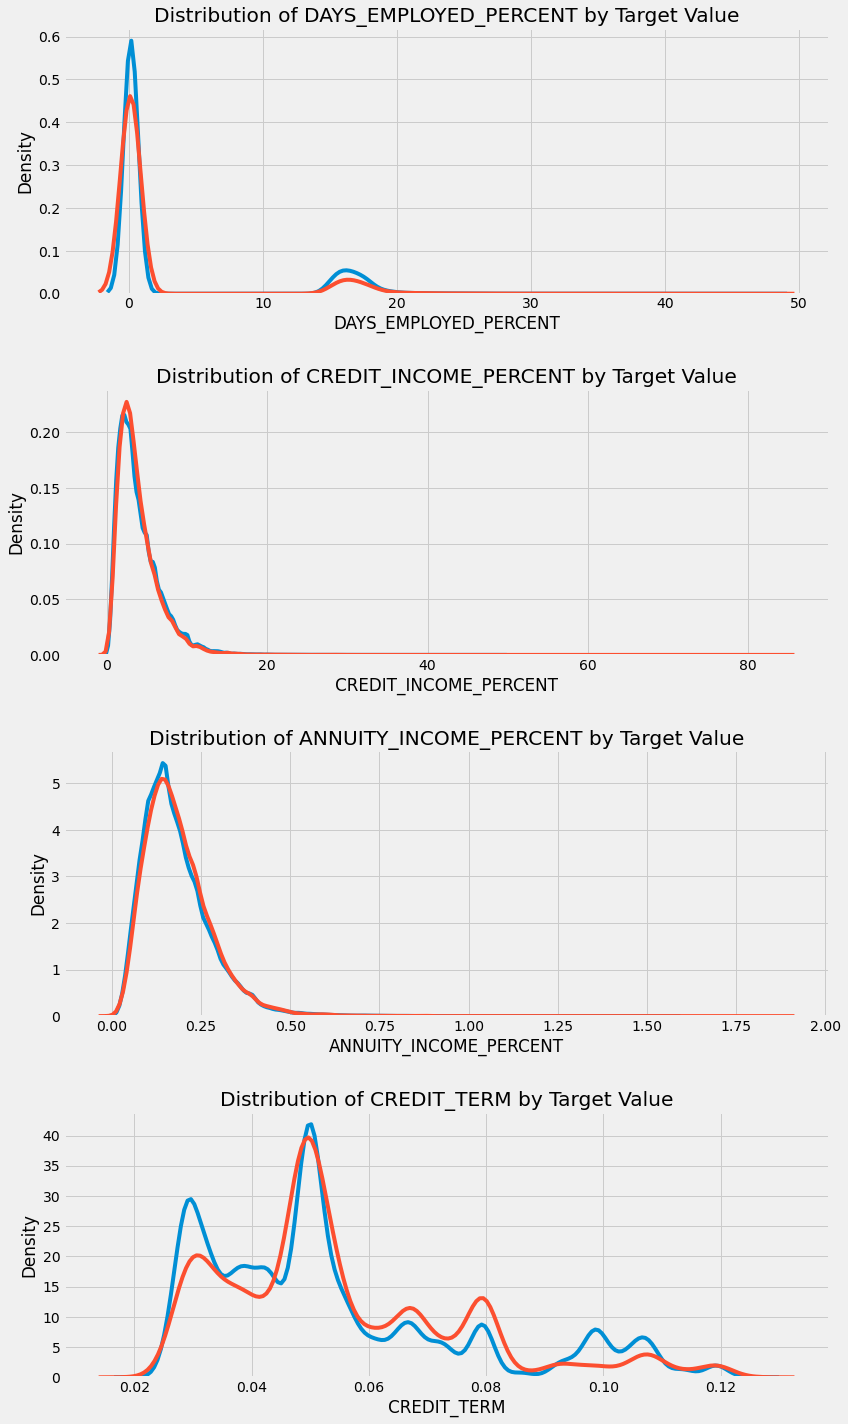

In [58]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['DAYS_EMPLOYED_PERCENT', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_essai1.loc[df_essai1['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_essai1.loc[df_essai1['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

#### Anamyse univariée

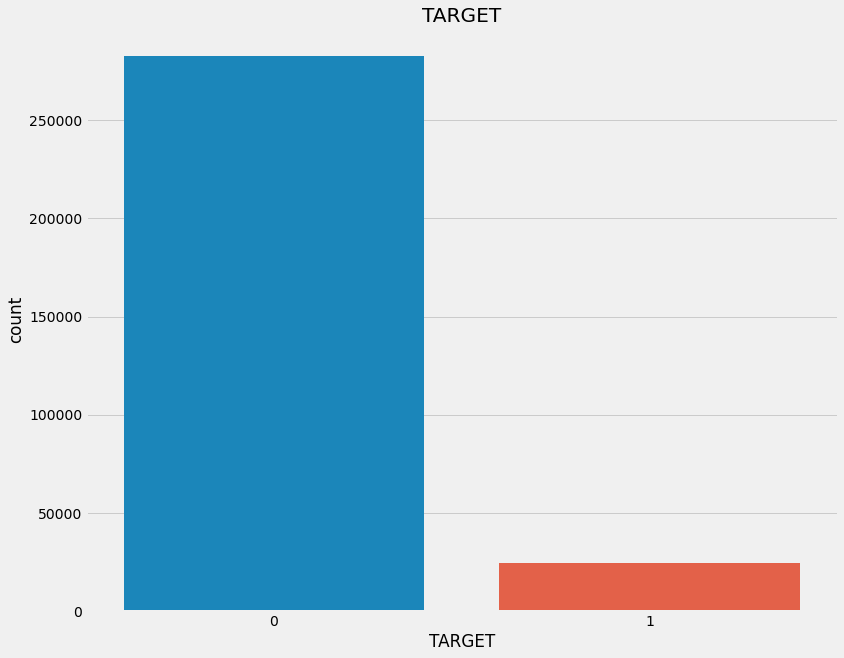

In [59]:
# Target
plt.figure(figsize=(12, 10))
sns.countplot(x="TARGET", data=df_essai1,
              order=df_essai1["TARGET"].value_counts().index[:2])
plt.title("TARGET")
plt.show()

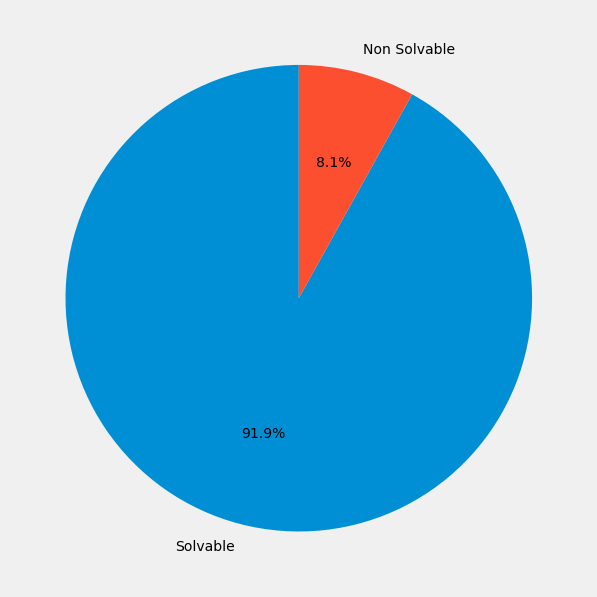

In [60]:
# Target en pourcentage
target_pourcent = df_essai1['TARGET'].value_counts()/len(df_essai1)*100
plt.figure(figsize=(12,10))
plt.pie(target_pourcent, autopct='%1.1f%%', labels=["Solvable", "Non Solvable"], startangle=90)
plt.show()

In [61]:
exploration = pd.DataFrame()
exploration['income_t'] = np.log1p(df_essai1['AMT_INCOME_TOTAL'])
exploration['credit_t'] = np.log1p(df_essai1['AMT_CREDIT'])
exploration['annuity_t'] = np.log1p(df_essai1['AMT_ANNUITY'])
exploration['goods_t'] = np.log1p(df_essai1['AMT_GOODS_PRICE'])
exploration.reset_index(inplace=True)

<AxesSubplot:ylabel='income_t'>

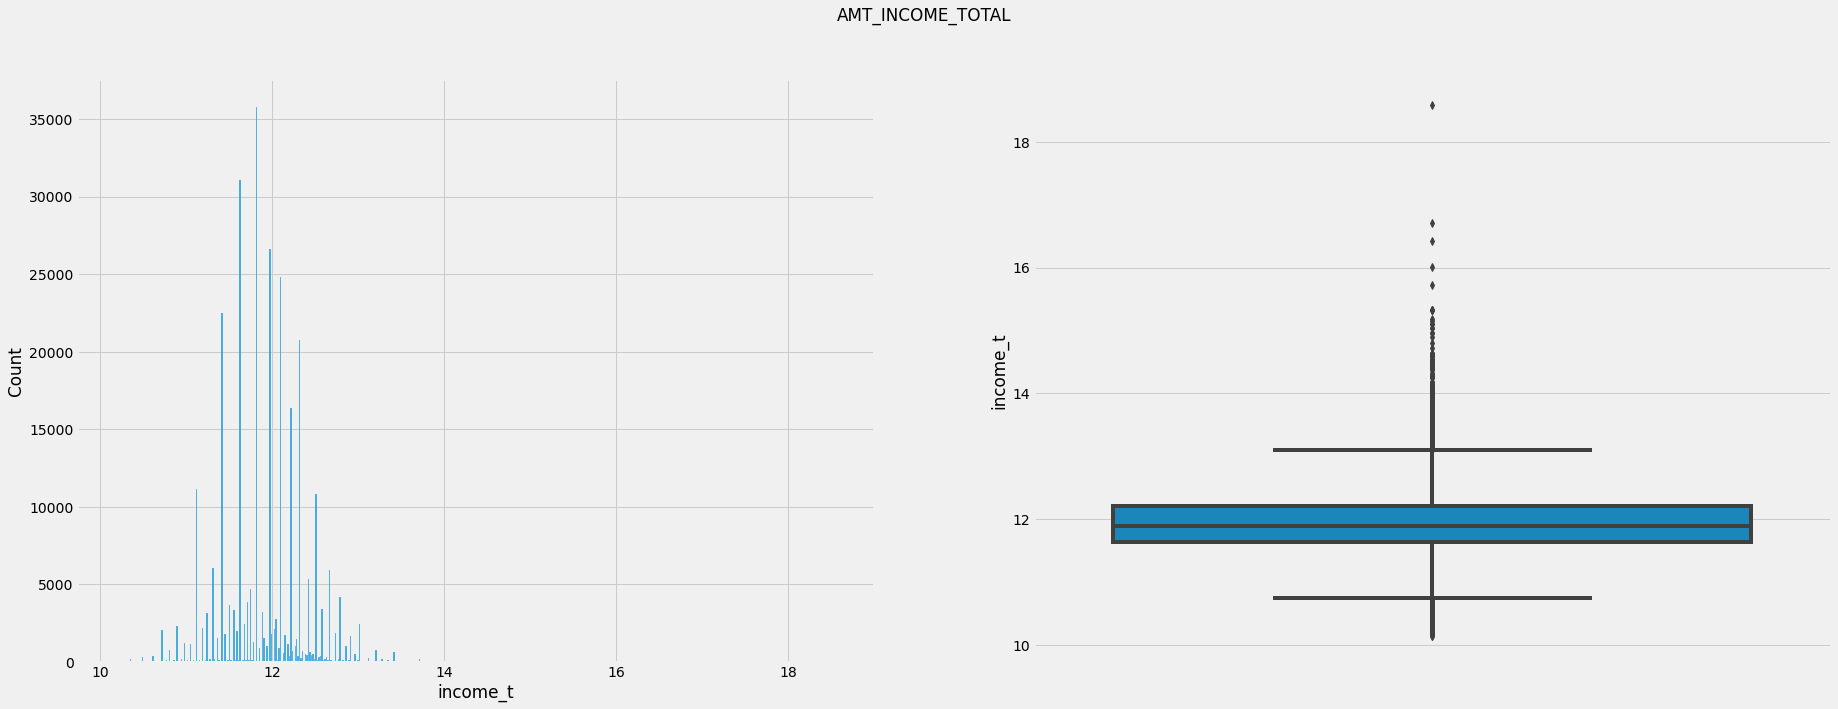

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(28, 10), sharey=False)
fig.suptitle('AMT_INCOME_TOTAL')

# histplot
sns.histplot(ax=axes[0], data=exploration, x="income_t")

# Boxplot
sns.boxplot(ax=axes[1], data=exploration, y='income_t')

<AxesSubplot:ylabel='credit_t'>

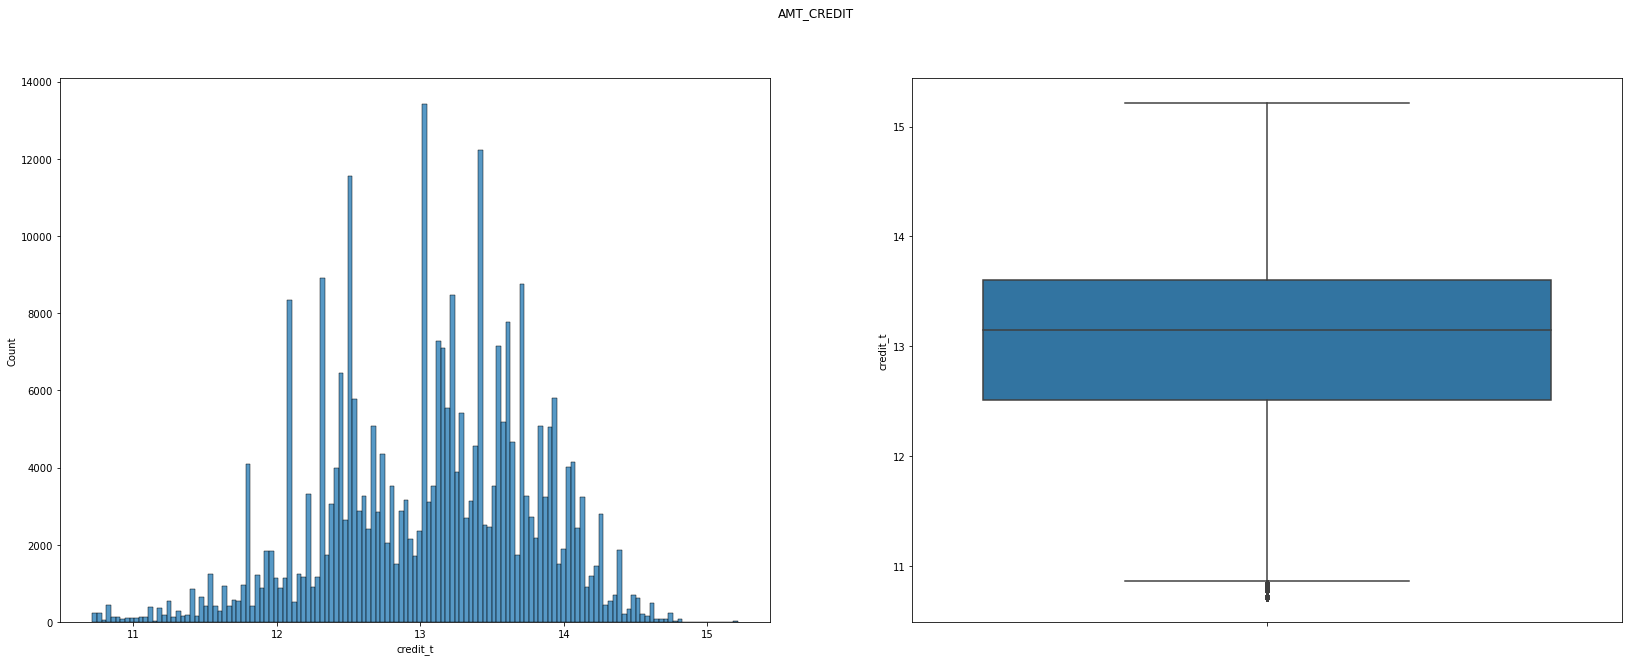

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(28, 10), sharey=False)
fig.suptitle('AMT_CREDIT')

# histplot
sns.histplot(ax=axes[0], data=exploration, x="credit_t")

# Boxplot
sns.boxplot(ax=axes[1], data=exploration, y='credit_t')

<AxesSubplot:ylabel='annuity_t'>

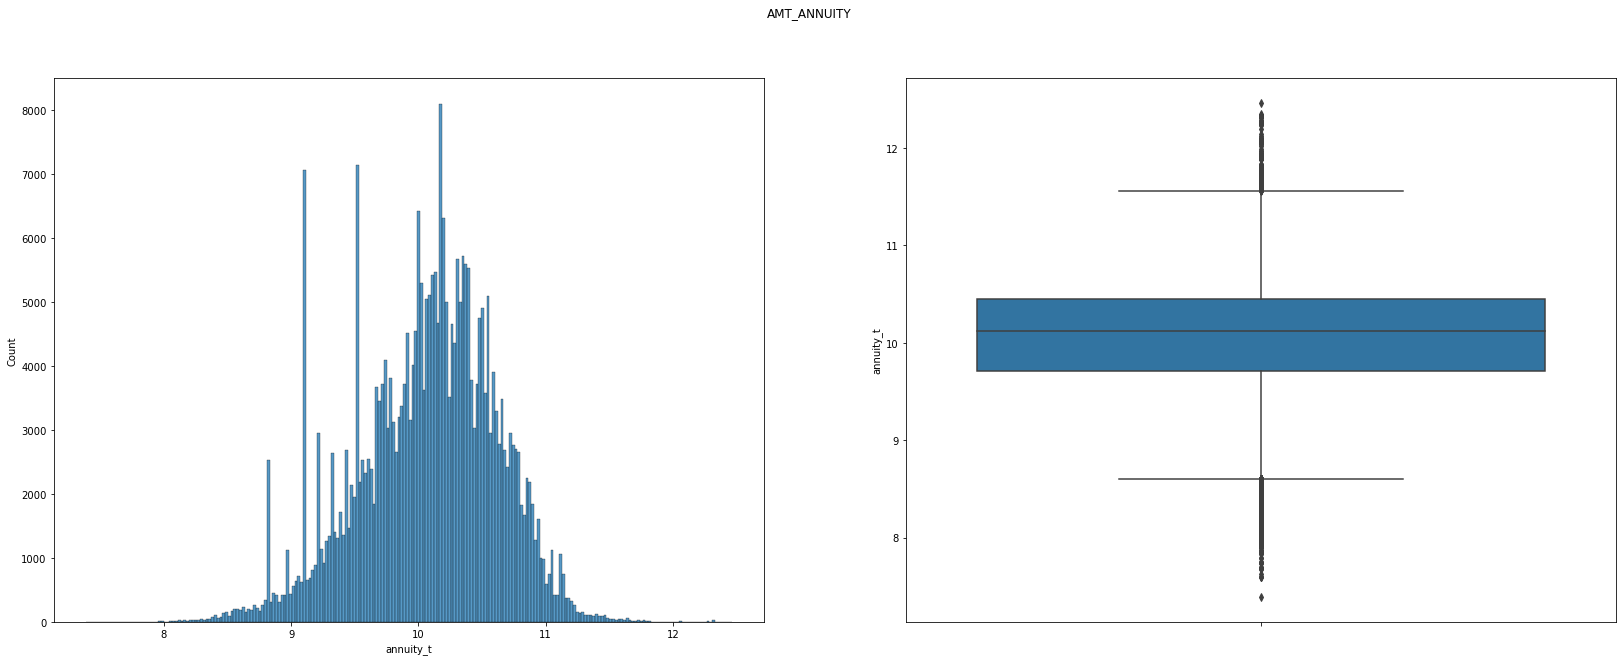

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(28, 10), sharey=False)
fig.suptitle('AMT_ANNUITY')

# histplot
sns.histplot(ax=axes[0], data=exploration, x="annuity_t")

# Boxplot
sns.boxplot(ax=axes[1], data=exploration, y='annuity_t')

<AxesSubplot:ylabel='goods_t'>

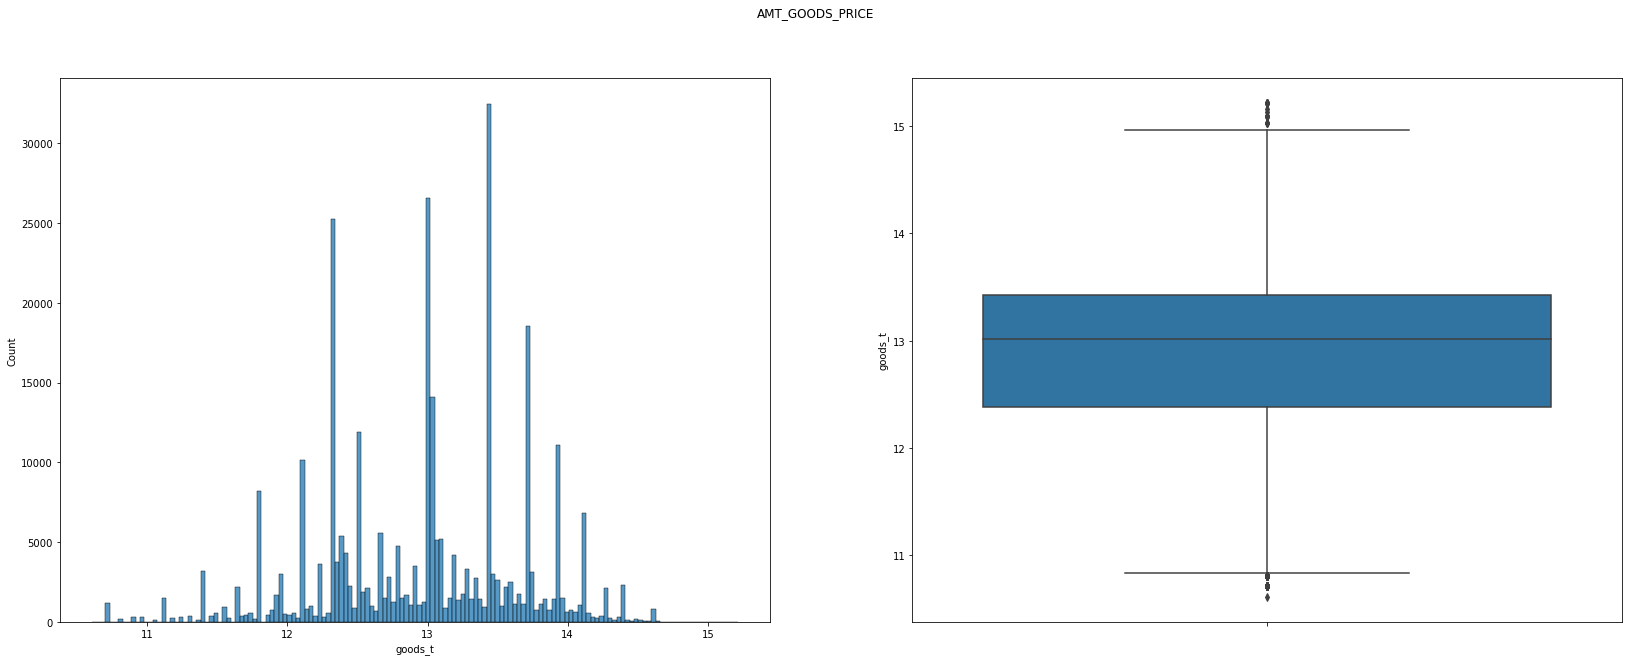

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(28, 10), sharey=False)
fig.suptitle('AMT_GOODS_PRICE')

# histplot
sns.histplot(ax=axes[0], data=exploration, x="goods_t")

# Boxplot
sns.boxplot(ax=axes[1], data=exploration, y='goods_t')

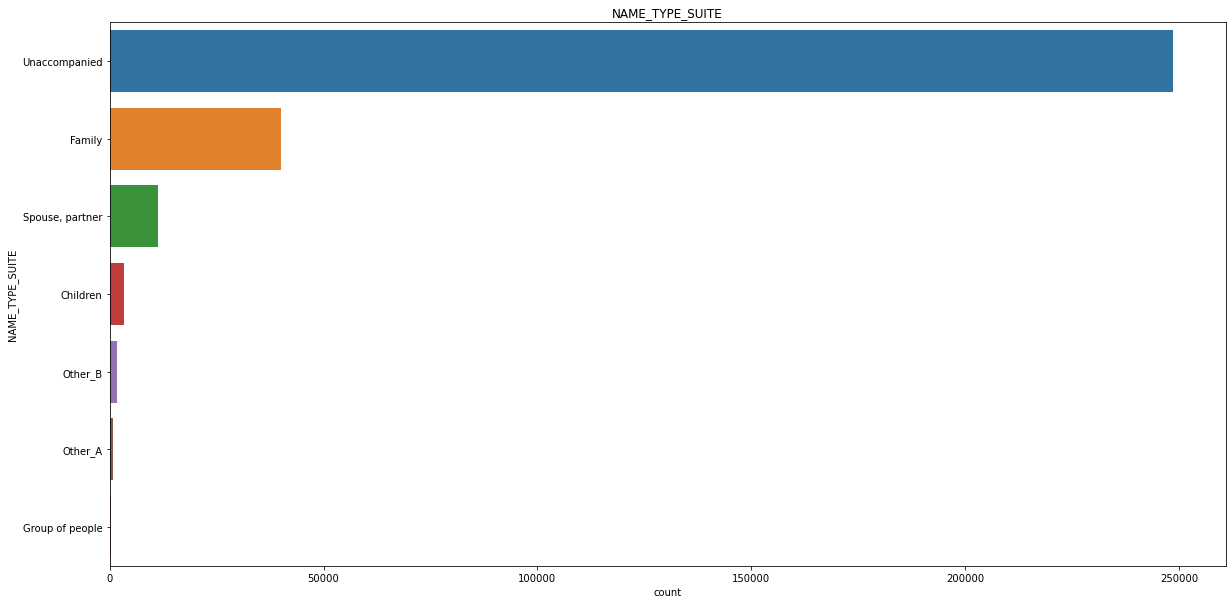

In [17]:
plt.figure(figsize=(20, 10))
sns.countplot(y="NAME_TYPE_SUITE", data=df_essai1,
              order=df_essai1["NAME_TYPE_SUITE"].value_counts().index[:7])
plt.title("NAME_TYPE_SUITE")
plt.show()

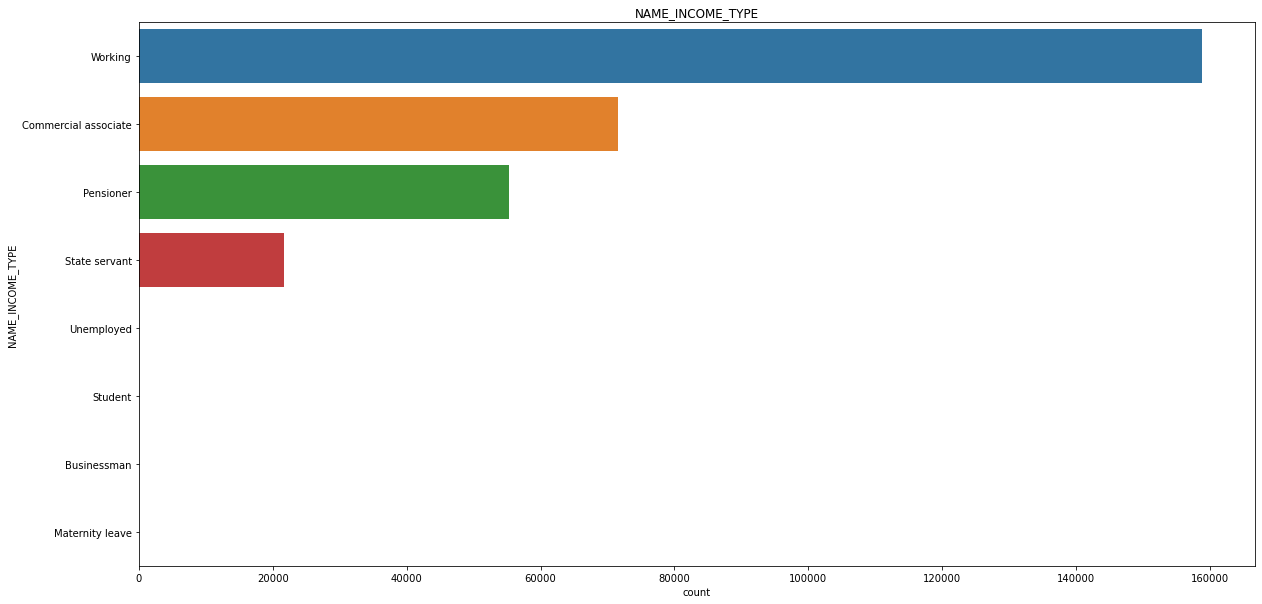

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(y="NAME_INCOME_TYPE", data=df_essai1,
              order=df_essai1["NAME_INCOME_TYPE"].value_counts().index[:10])
plt.title("NAME_INCOME_TYPE")
plt.show()

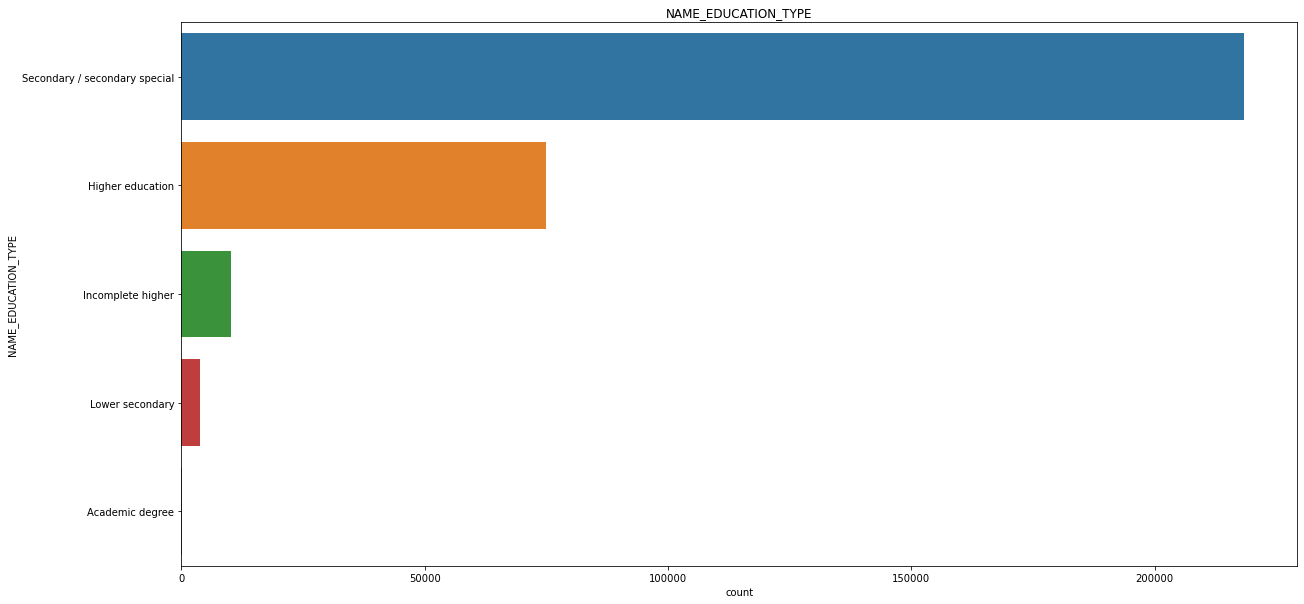

In [19]:
plt.figure(figsize=(20, 10))
sns.countplot(y="NAME_EDUCATION_TYPE", data=df_essai1,
              order=df_essai1["NAME_EDUCATION_TYPE"].value_counts().index[:10])
plt.title("NAME_EDUCATION_TYPE")
plt.show()

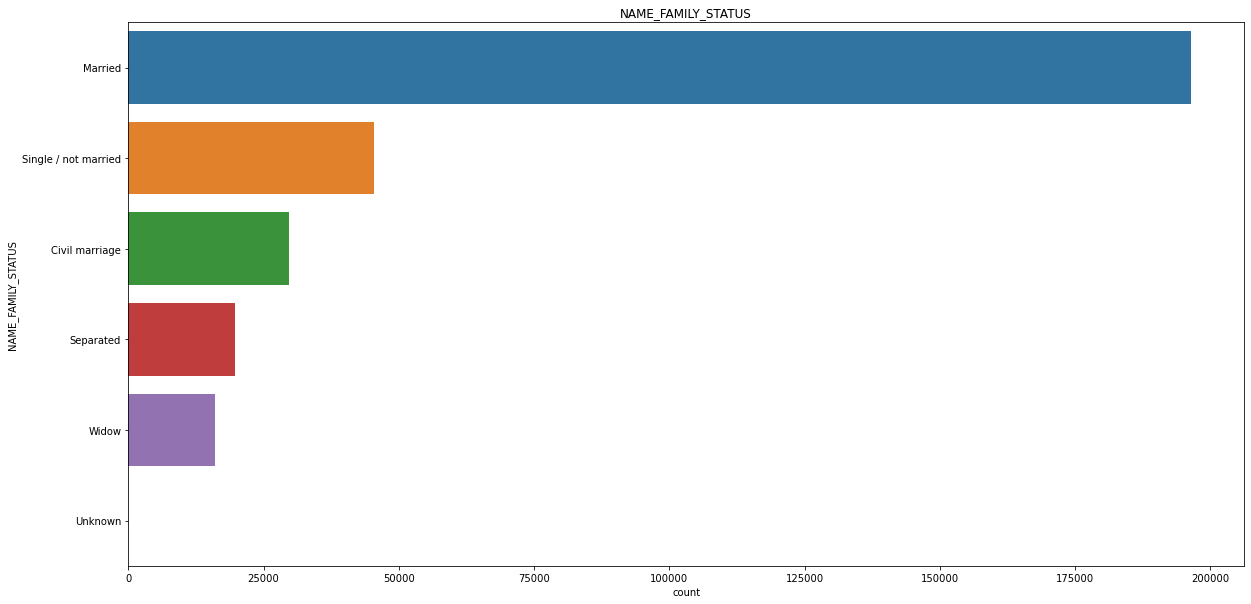

In [20]:
plt.figure(figsize=(20, 10))
sns.countplot(y="NAME_FAMILY_STATUS", data=df_essai1,
              order=df_essai1["NAME_FAMILY_STATUS"].value_counts().index[:10])
plt.title("NAME_FAMILY_STATUS")
plt.show()

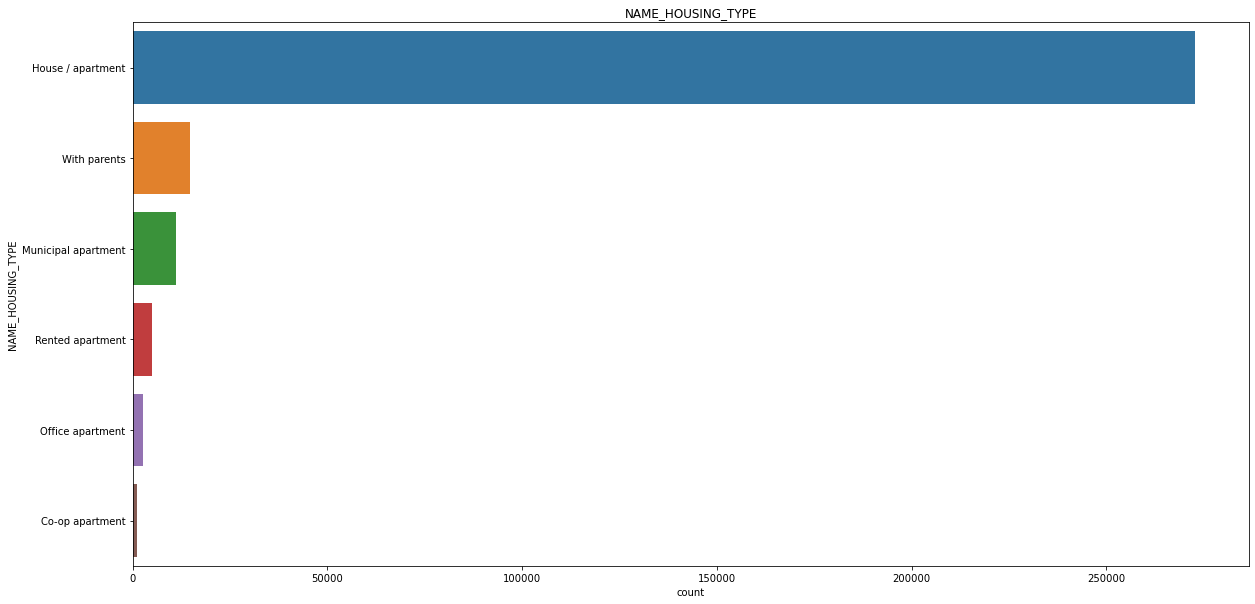

In [21]:
plt.figure(figsize=(20, 10))
sns.countplot(y="NAME_HOUSING_TYPE", data=df_essai1,
              order=df_essai1["NAME_HOUSING_TYPE"].value_counts().index[:10])
plt.title("NAME_HOUSING_TYPE")
plt.show()

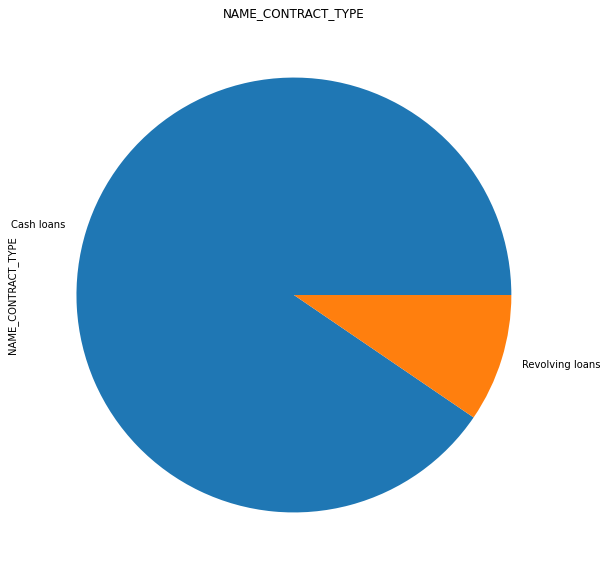

In [22]:
plt.figure(figsize=(10,10))
df_essai1.NAME_CONTRACT_TYPE.value_counts().plot.pie()
plt.title("NAME_CONTRACT_TYPE")
plt.show()

In [22]:
(df_essai1['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

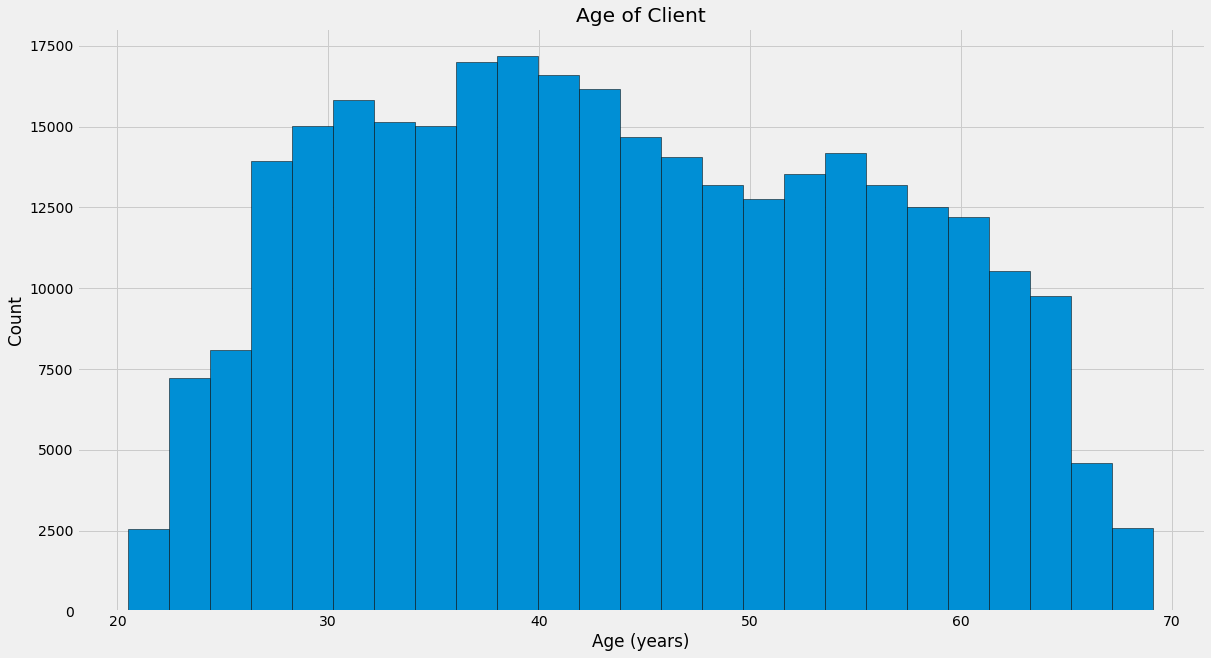

In [30]:
plt.figure(figsize=(18, 10))
plt.hist(df_essai1['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

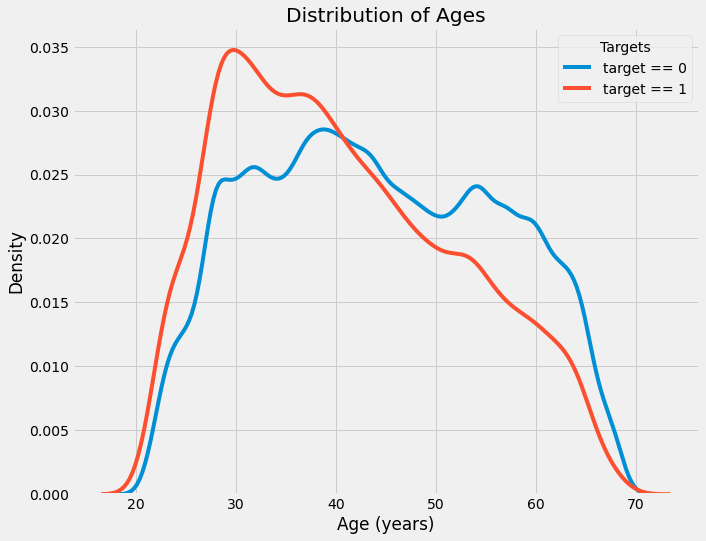

In [37]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df_essai1.loc[df_essai1['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_essai1.loc[df_essai1['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages'); plt.legend(title='Targets');

In [48]:
# Age information into a separate dataframe
age_data = df_essai1[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
#age_data.head(10)

<ipython-input-48-06997703a50e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365
<ipython-input-48-06997703a50e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


In [49]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
#age_groups

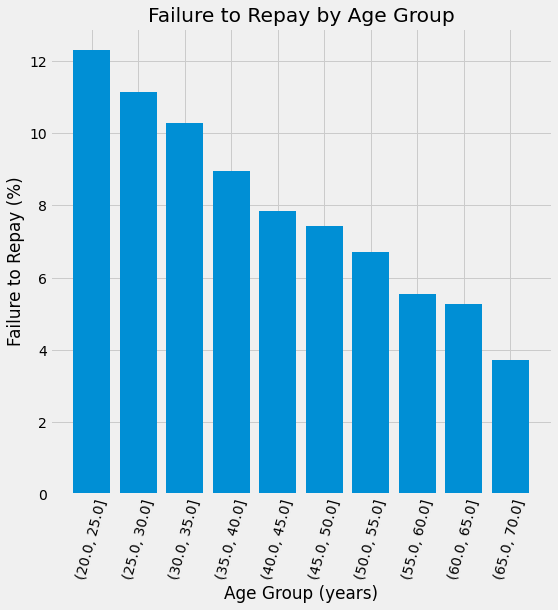

In [50]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

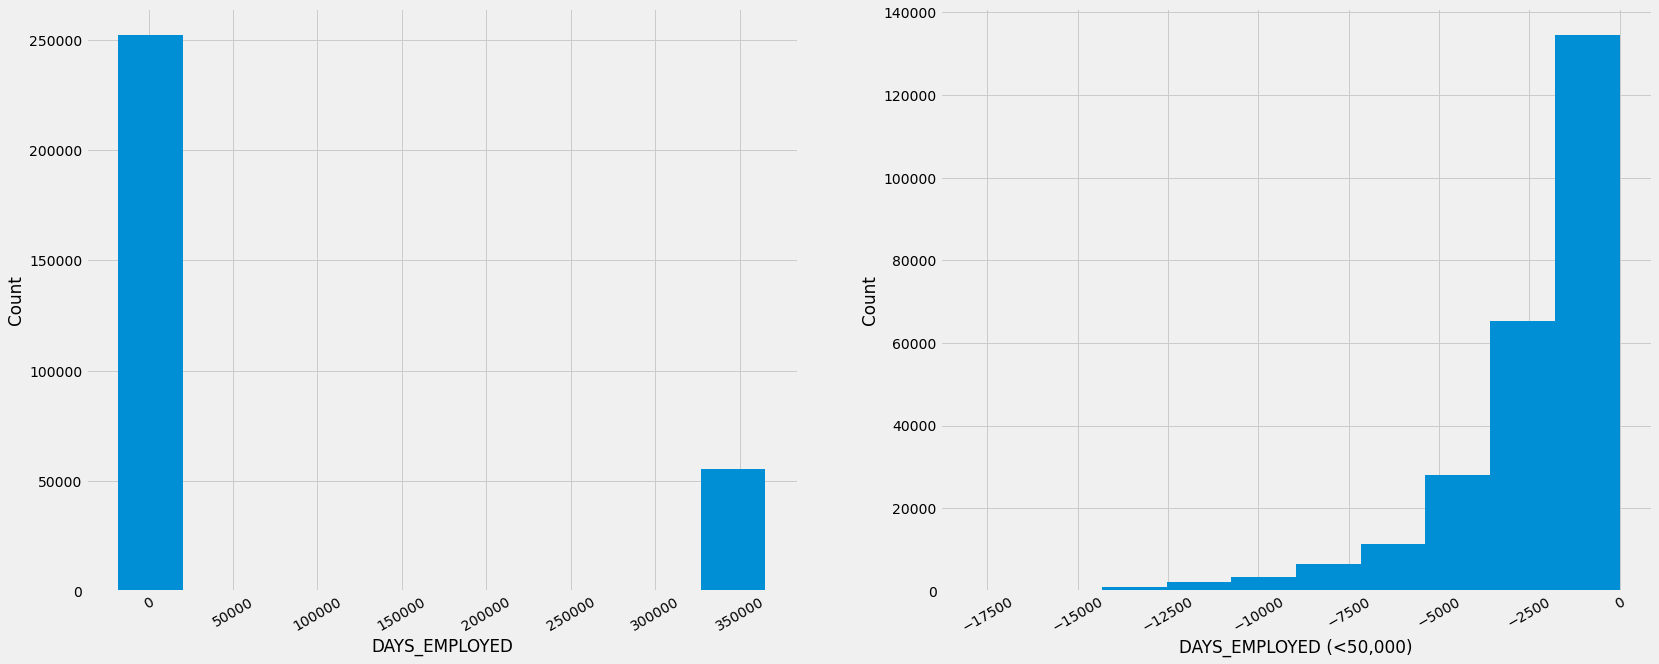

In [31]:
# Affiche l'histogramme du nombre de jours employés
fig = plt.figure(1, figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.hist(x="DAYS_EMPLOYED", data=df_essai1)
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Count')
plt.xticks(rotation=30)

# Affiche l'histogramme pour les valeurs normales
df_days=df_essai1[df_essai1['DAYS_EMPLOYED'] < 50000]
plt.subplot(1, 2, 2)
plt.hist(x="DAYS_EMPLOYED", data=df_days)
plt.xlabel('DAYS_EMPLOYED (<50,000)')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

In [24]:
df_essai1.loc[df_essai1['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED']

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

In [25]:
df_essai1.loc[df_essai1['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

**Voir pour faire un MissingIndicator sur les Days_employed > 0. Pour essai, on supprime**

In [26]:
df_essai1 = df_essai1[df_essai1['DAYS_EMPLOYED'] < 0]

#### Analyse bivariée

In [38]:
# Find correlations with the target and sort
correlations = df_essai1.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                 -0.160472
DAYS_EMPLOYED                -0.044932
EMPLOYED_RATIO               -0.044489
AMT_GOODS_PRICE              -0.039653
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
FLAG_DOCUMENT_6              -0.028602
HOUR_APPR_PROCESS_START      -0.024166


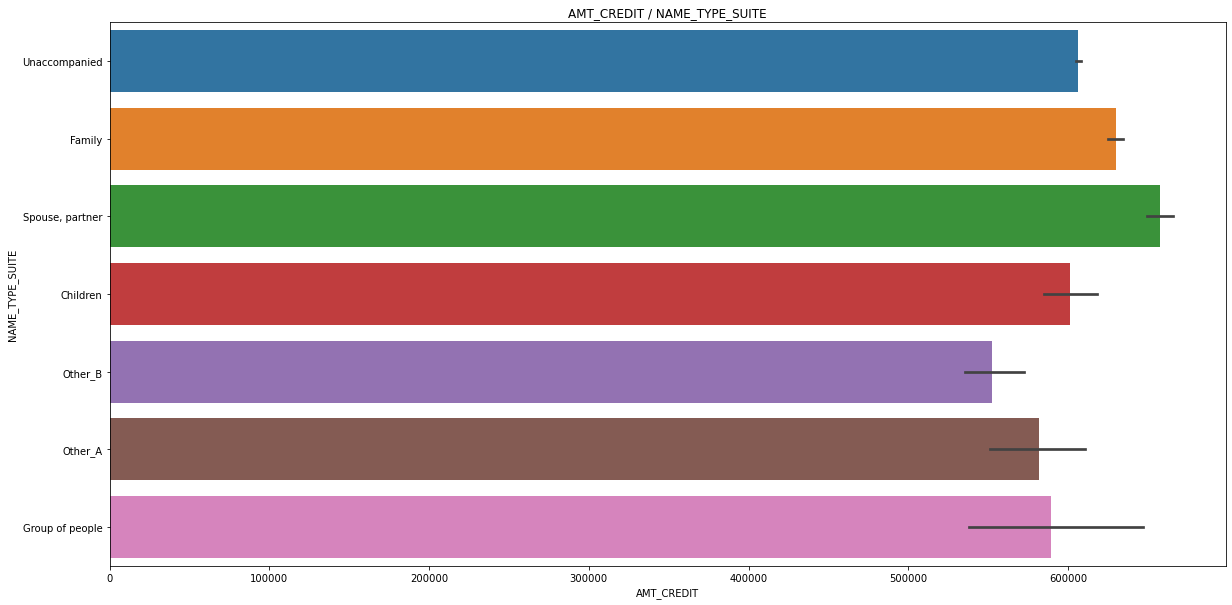

In [30]:
plt.figure(figsize=(20, 10))
sns.barplot(x="AMT_CREDIT", y='NAME_TYPE_SUITE', data=df_essai1, order=df_essai1["NAME_TYPE_SUITE"].value_counts().index[:7])
plt.title("AMT_CREDIT / NAME_TYPE_SUITE")
plt.show()

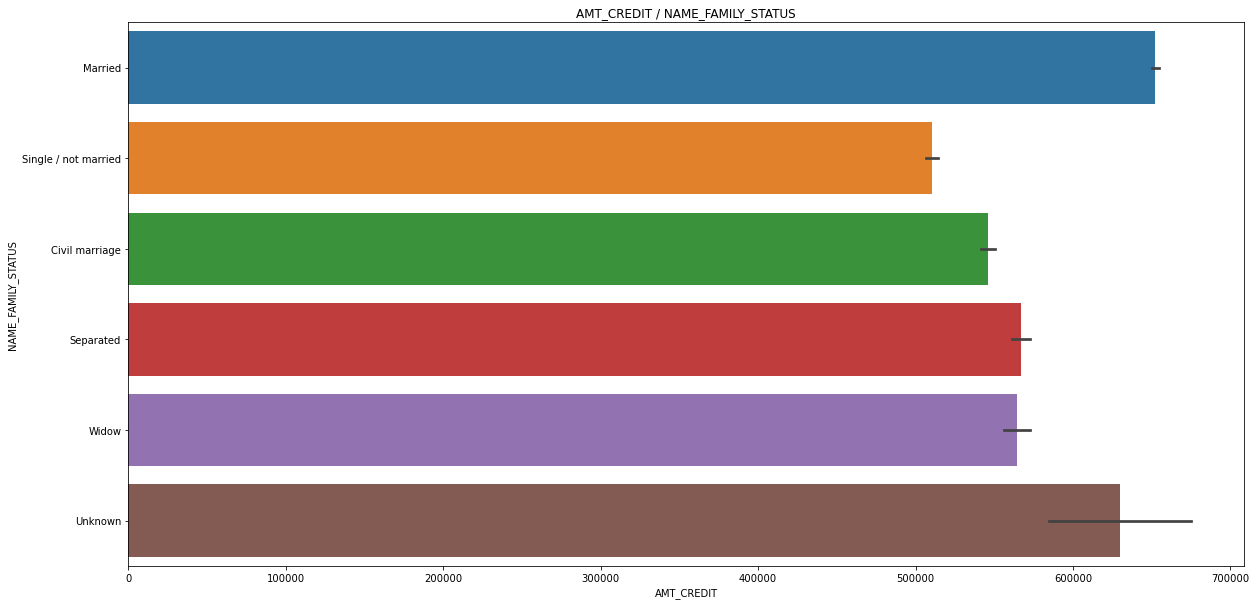

In [31]:
plt.figure(figsize=(20, 10))
sns.barplot(x="AMT_CREDIT", y='NAME_FAMILY_STATUS', data=df_essai1, order=df_essai1["NAME_FAMILY_STATUS"].value_counts().index[:7])
plt.title("AMT_CREDIT / NAME_FAMILY_STATUS")
plt.show()

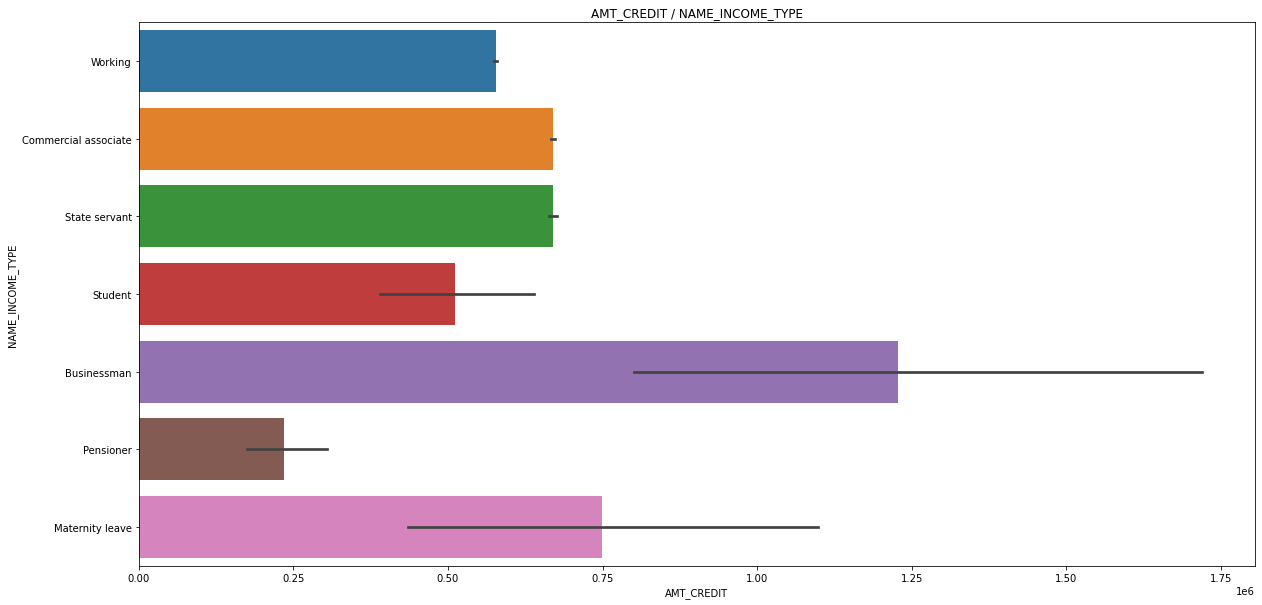

In [32]:
plt.figure(figsize=(20, 10))
sns.barplot(x="AMT_CREDIT", y='NAME_INCOME_TYPE', data=df_essai1, order=df_essai1["NAME_INCOME_TYPE"].value_counts().index[:7])
plt.title("AMT_CREDIT / NAME_INCOME_TYPE")
plt.show()

#### Anovas

In [33]:
df_essai1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,EMPLOYED_RATIO,LOAN_RATE,DEBT_RATIO
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067329,200.788889,12.197778
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.070862,479.075000,13.221667
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.011814,200.000000,10.000000


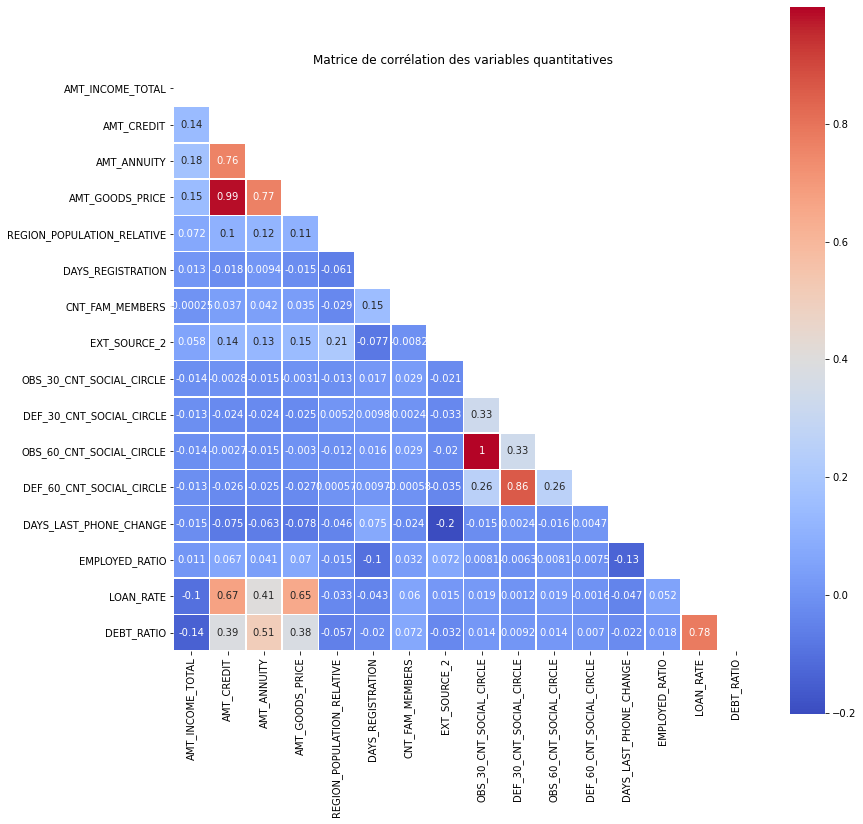

In [34]:
# Affichage matice correlations
corr_matrix = df_essai1.select_dtypes('float').corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(13,13))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

In [35]:
pg.anova(data=df_essai1, dv="AMT_GOODS_PRICE", between="AMT_CREDIT", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,AMT_CREDIT,3.507574e+16,5330,6.580815e+12,42881.427518,0.0,0.998921
1,Within,3.787587e+13,246804,1.534654e+08,NaN,NaN,NaN


In [36]:
pg.anova(data=df_essai1, dv="AMT_ANNUITY", between="AMT_CREDIT", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,AMT_CREDIT,4.428497e+13,5330,8.308625e+09,209.032963,0.0,0.81866
1,Within,9.809468e+12,246792,3.974792e+07,NaN,NaN,NaN


In [63]:
df_essai1.to_csv(r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\modifie\essaiML1.csv", index=False)